In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-10 12:40:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-10 12:40:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-10 12:40:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(50, 10000)


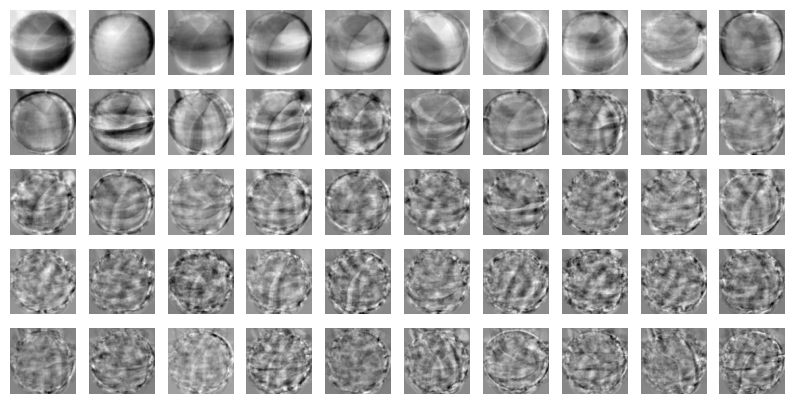

<built-in method reshape of numpy.ndarray object at 0x7b9622d7dd70>
(300, 50)


In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
# 2차원 배열 (샘플개수, 너비*높이)로 변경
fruits_2d=fruits.reshape(-1,100*100)
# PCA클래스 제공
from sklearn.decomposition import PCA
# 주성분의 개수 지정.
pca=PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  # 한 줄에 10개씩 이미지 그리기.
  rows=int(np.ceil(n/10))
  # 행이 1개면 열 개수는 샘플 개수임.
  cols=n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,
                      figsize=(cols*ratio, rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()
draw_fruits(pca.components_.reshape(-1,100,100))
print(fruits_2d.reshape)
# 30,10000 크기의 배열을 PCA를 사용해 300,50 크기로 변환.
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)


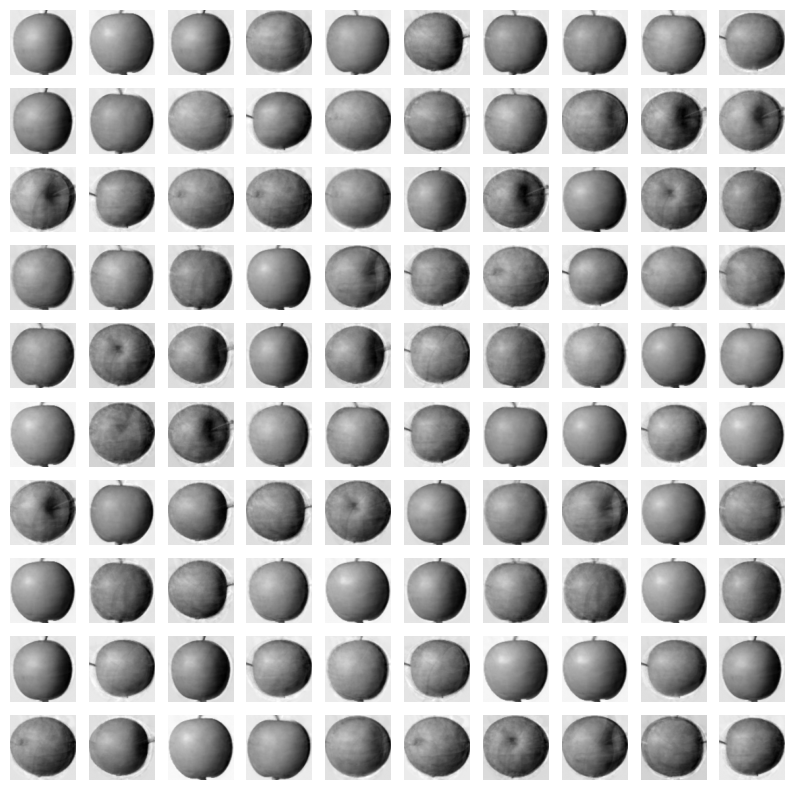

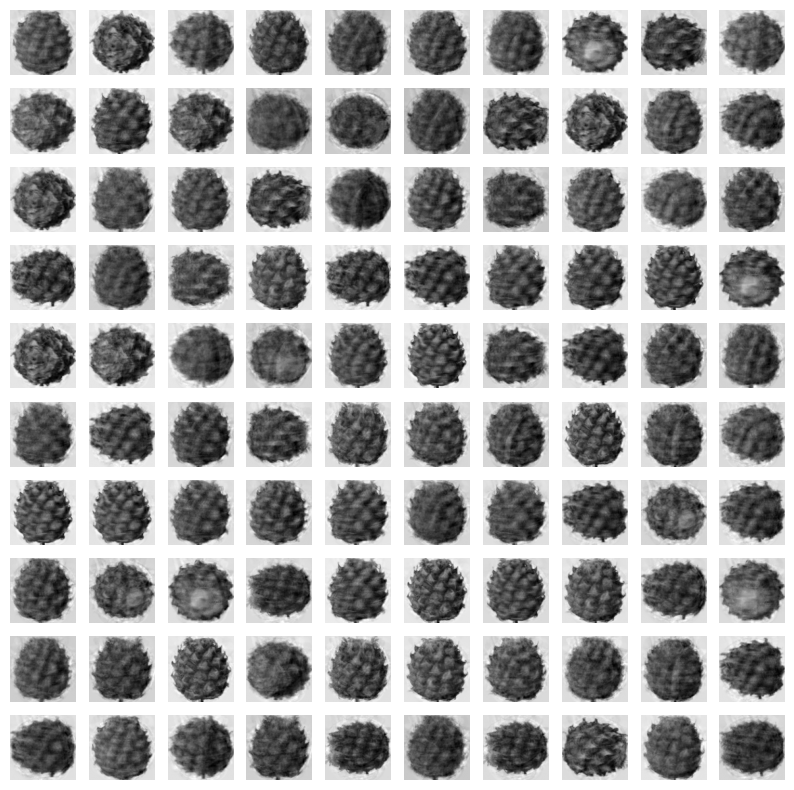

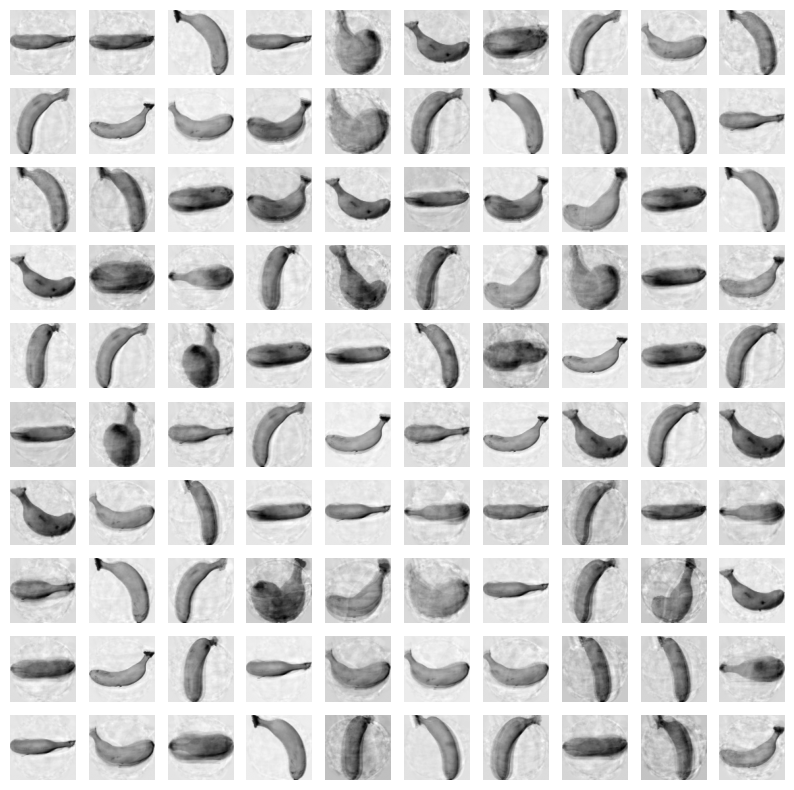

In [ ]:
# 원본 데이터 재구성

# 복원
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

0.9215656584597033


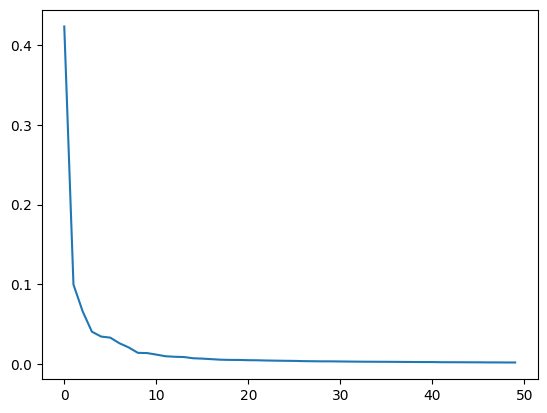

In [ ]:
# 설명된 분산

print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# PCA로 축소한 데이터를 지도학습에 적용하고 원본 데이터와 비교

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 순서대로 사과, 파인애플, 바나나
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
from sklearn.model_selection import cross_validate

# 로지스틱 회귀와 원본 데이터 버전
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
# 각 교차검증폴드의 훈련 시간
print(np.mean(scores['fit_time']))

# 로지스틱 회귀와 PCA 버전
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#=====> 정확도 동일, 훈련시간 30배이상 감소!

# 주성분의 개수를 지정하는 대신,
# 설명된 분산의 비율을 입력할 수도 있음.
# 셜명된 분산의 50%에 달하는 주성분 찾기
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)
# 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.
print(pca.n_components_) # 2
# 주성분 2개로 데이터 변환
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)
# PCA - 주성분 2개 버전
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.8636940479278565


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.99
0.07763967514038086
2
(300, 2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.99
0.12957315444946288


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


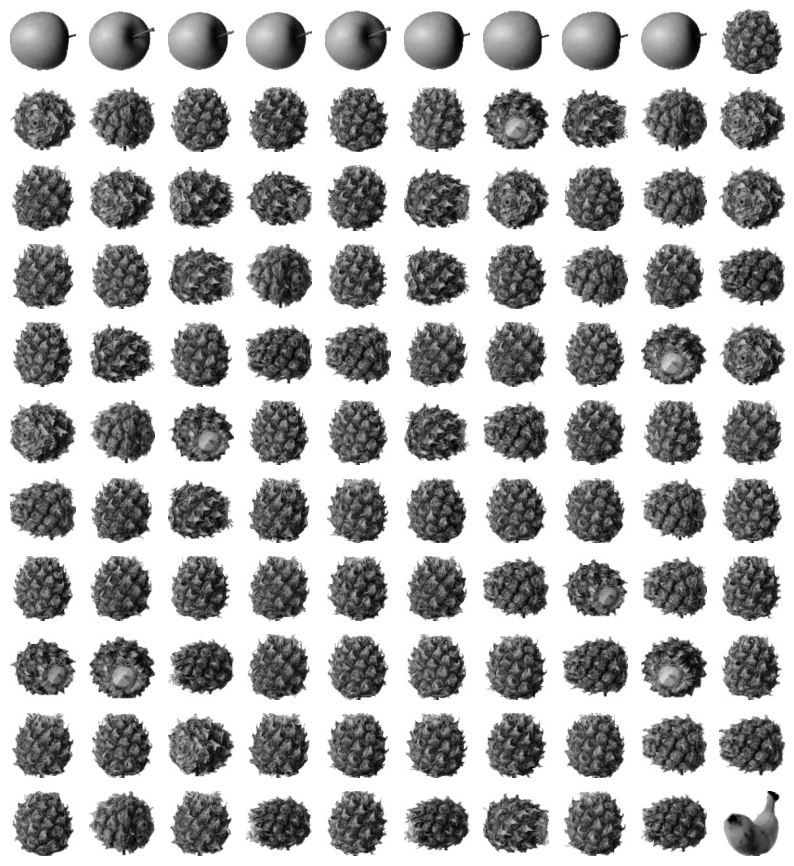

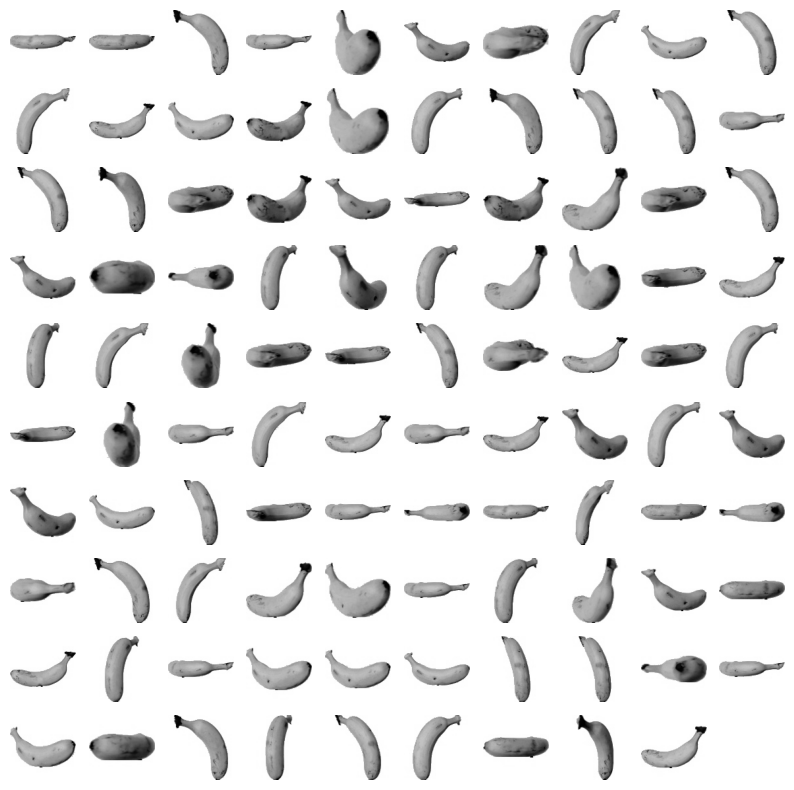

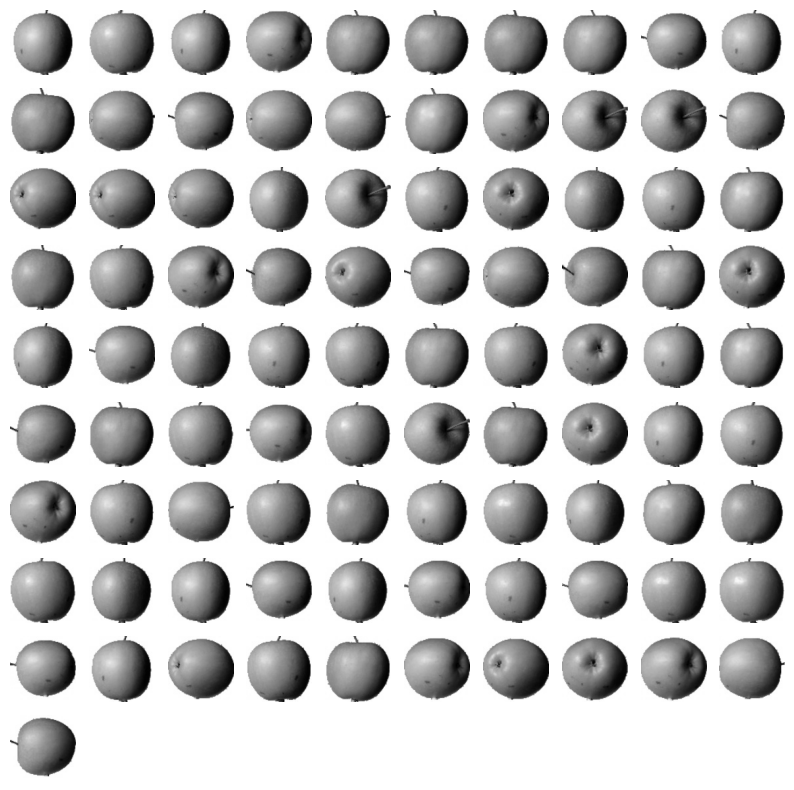

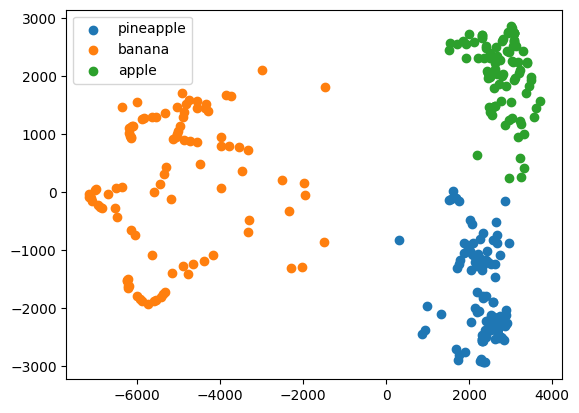

In [ ]:
# k-mean 알고리즘과 PCA-주성분 2개 버전

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# 산점도
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()